In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

atx_housing = "assessment_by_zip_csv/assessment_history_by_zipcode_combined.csv"

atx_housing_df = pd.read_csv(atx_housing)
# atx_housing_df.dropna(axis=0, inplace=True)
print(atx_housing_df.count())
atx_housing_df.head()

propid            2479
zip               2479
appraisal_2017    2479
appraisal_2016    2479
appraisal_2015    2479
appraisal_2014    2479
appraisal_2013    2479
dtype: int64


,propid,zip,appraisal_2017,appraisal_2016,appraisal_2015,appraisal_2014,appraisal_2013
0,1.660220e+13,78702,473405,276086,345169,291544,209168
1,4.442100e+12,78702,865137,917886,643887,556703,110000
2,5.080470e+12,78702,1047246,1241888,1010125,832768,427969
3,1.441750e+13,78702,2061465,1549421,1073359,889790,1005585
4,2.929880e+12,78702,715305,583486,387576,388557,389373


In [2]:
atx_housing_df = atx_housing_df.groupby("zip").mean()

atx_housing_df = atx_housing_df.drop(columns=["propid"])

atx_housing_df = atx_housing_df.rename(columns={"appraisal_2017": "2017",
                                        "appraisal_2016": "2016",
                                        "appraisal_2015": "2015",
                                        "appraisal_2014": "2014",
                                        "appraisal_2013": "2013"
                                       })
atx_housing_df = atx_housing_df[["2013", "2014", "2015", "2016", "2017"]]

atx_housing_df.head()

,2013,2014,2015,2016,2017
zip,,,,,
78702,210200.395538,303649.764706,349673.582150,400830.470588,448190.612576
78704,228935.295775,312662.631791,347807.754527,378487.941650,428413.835010
78731,603906.176707,683897.979920,713834.353414,773869.763052,789825.170683
78746,596187.709677,711603.338710,777883.631048,841829.217742,869811.409274
78751,381931.549495,416629.729293,469314.884848,519598.985859,545357.898990


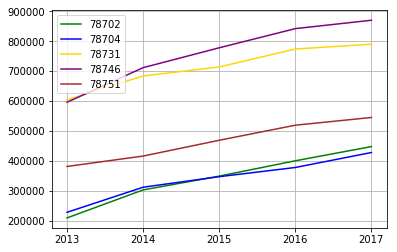

In [3]:
years = atx_housing_df.keys()

# Plot the unemployment values for a single country
zip_78702, = plt.plot(years, atx_housing_df.loc[78702,["2013","2014","2015","2016","2017"]], 
                        color="green",label="78702")

zip_78704, = plt.plot(years, atx_housing_df.loc[78704,["2013","2014","2015","2016","2017"]], 
                        color="blue",label="78704")

zip_78731, = plt.plot(years, atx_housing_df.loc[78731,["2013","2014","2015","2016","2017"]], 
                        color="gold",label="78731")

zip_78746, = plt.plot(years, atx_housing_df.loc[78746,["2013","2014","2015","2016","2017"]], 
                        color="purple",label="78746")

zip_78751, = plt.plot(years, atx_housing_df.loc[78751,["2013","2014","2015","2016","2017"]], 
                        color="brown",label="78751")

# Create a legend for our chart
plt.legend(handles=[zip_78702, zip_78704, zip_78731, zip_78746, zip_78751], loc="best")

plt.grid()

# Show the chart
plt.show()



In [4]:
pct_change = atx_housing_df

In [5]:
pct_change["delta_13_14"] = ((pct_change["2014"] - pct_change["2013"]) / pct_change["2013"]) * 100
pct_change["delta_14_15"] = ((pct_change["2015"] - pct_change["2014"]) / pct_change["2014"]) * 100
pct_change["delta_15_16"] = ((pct_change["2016"] - pct_change["2015"]) / pct_change["2015"]) * 100
pct_change["delta_16_17"] = ((pct_change["2017"] - pct_change["2016"]) / pct_change["2016"]) * 100

pct_change = pct_change.drop(columns=["2013", "2014", "2015", "2016", "2017"])

pct_change = pct_change.rename(columns={"delta_13_14": "2014",
                                        "delta_14_15": "2015",
                                        "delta_15_16": "2016",
                                        "delta_16_17": "2017"})

pct_change

,2014,2015,2016,2017
zip,,,,
78702,44.457276,15.156876,14.629898,11.815504
78704,36.572489,11.240589,8.821019,13.190881
78731,13.245734,4.377316,8.410272,2.061769
78746,19.358941,9.314219,8.220457,3.323975
78751,9.084921,12.645558,10.714363,4.957460


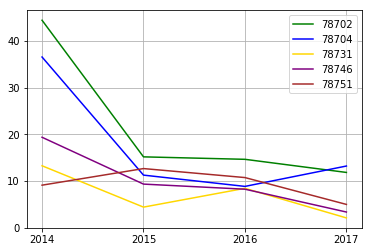

In [6]:
years1 = pct_change.keys()

# Plot the unemployment values for a single country
pct_78702, = plt.plot(years1, pct_change.loc[78702,["2014","2015","2016","2017"]], 
                        color="green",label="78702")

pct_78704, = plt.plot(years1, pct_change.loc[78704,["2014","2015","2016","2017"]], 
                        color="blue",label="78704")

pct_78731, = plt.plot(years1, pct_change.loc[78731,["2014","2015","2016","2017"]], 
                        color="gold",label="78731")

pct_78746, = plt.plot(years1, pct_change.loc[78746,["2014","2015","2016","2017"]], 
                        color="purple",label="78746")

pct_78751, = plt.plot(years1, pct_change.loc[78751,["2014","2015","2016","2017"]], 
                        color="brown",label="78751")

# Create a legend for our chart
plt.legend(handles=[pct_78702, pct_78704, pct_78731, pct_78746, pct_78751], loc="best")

plt.grid()

# Show the chart
plt.show()

In [ ]:
zip_group_final = zip_group1[["total_delta", "appraisal_2017", "delta_16_17", "appraisal_2016", "delta_15_16", "appraisal_2015", "delta_14_15", "appraisal_2014", "delta_13_14", "appraisal_2013"]]
zip_group_final

In [ ]:
zip_group_final.to_csv("housing_final_by_zip.csv")